In [39]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

print("Done!")


Done!


In [61]:
"""display function"""

"""The RNN code follows the same structure as the CNN code with small differences in the reshaping """

def display_n_plots_format2(t_axis,data,n,m,wave_2=None, c=1, Mode=0):
    print("--------------------------------------------------------")

    if Mode!=False:

        for i in range(n):
            exec(f'SecondWave{i+1}=np.array([])')
        for i in range(100):
            for j in range(n):
                exec(f'SecondWave{j+1}=np.append(SecondWave{j+1}, wave_2[{m}][{i}][{j}])')
        SecondWaves=[]
        for i in range(n):
            exec (f'SecondWaves.append(SecondWave{i+1})')

    for i in range(n):
        exec(f'Channel{i+1}=np.array([])')
    for i in range(100):
        for j in range(n):
            exec(f'Channel{j+1}=np.append(Channel{j+1}, data[{m}][{i}][{j}])')
    Channels=[]
    for i in range(n):
        exec (f'Channels.append(Channel{i+1})')



    fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # Adjust the figure size
    y_limits = (-250, 250)
    for i, ax in enumerate(axs.flat):
        ax.plot(t_axis, c * Channels[i], lw=2, alpha=0.7, label="Real_signal")

        if Mode!=False:
            ax.plot(t_axis, c * SecondWaves[i], lw=1.5, alpha=0.9, label="Predicted_signal")

        ax.set_title(f'Channel {i + 1}', fontsize=10)

        ax.set_ylim(y_limits)
        ax.grid(True, lw=0.5)
        ax.label_outer()  # Only show outer labels to avoid redundancy

    plt.legend()
    fig.suptitle('16 Controlled channels', fontsize=22)  # Add a super title
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit super title
    #plt.savefig(f'Figure {int(t_axis[-1] //200)+1} w 16 Controlled channels')
    plt.savefig(f'plot_n_{m}')
    #plt.show()
    plt.clf()


print("Done!")

Done!


In [41]:
training_data=pd.read_pickle("training_data_High_Amplitude.pkl")
real_data=pd.read_pickle("real_data_High_Amplitude.pkl")

noisy_test=pd.read_pickle("Test_data_High_Amplitude.pkl")
real_test=pd.read_pickle("Test_real_High_Amplitude.pkl")

print("Done!")

Done!


In [42]:
Params = 128, 1000, 16
Params1 = 192, 1000, 16


def remove_time_transpose_reshape(set, params):
    set = set.drop(columns=['t_axis'])
    #set=set.transpose()
    set = set.values
    return set.reshape(params[0], params[1], params[2])
print("Done!")

Done!


In [43]:
""" reshapes the data st it can fit in the RNN """
#print(type(training_data))
N_Train_Data = remove_time_transpose_reshape(training_data, Params)
C_Train_Real = remove_time_transpose_reshape(real_data, Params)
N_Test_Data = remove_time_transpose_reshape(noisy_test, Params1)
C_Test_Real = remove_time_transpose_reshape(real_test, Params1)
print("Done!")

Done!


/tmp/ipykernel_3209/2670952576.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  set = set.drop(columns=['t_axis'])


--------------------------------------------------------


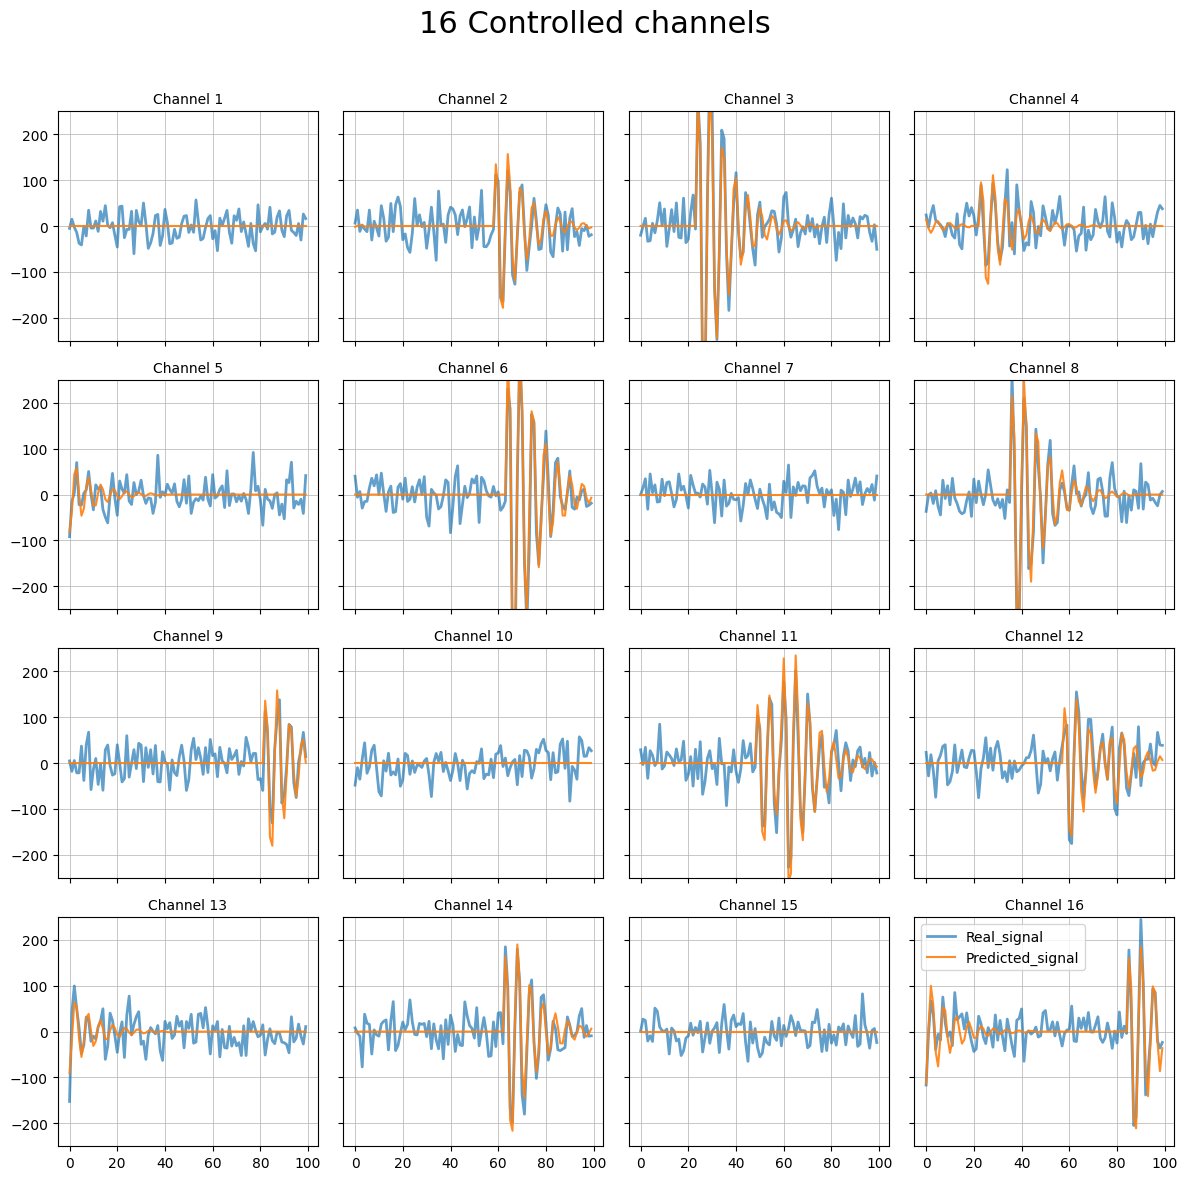

Done!


<Figure size 640x480 with 0 Axes>

In [44]:
t_axis = np.arange(0, 100, 1)
display_n_plots_format2(t_axis, N_Train_Data, 16, 5, C_Train_Real, 1, 1)
print("Done!")

In [45]:
"""normalize to go from -1 to 1"""
maxes=[]
maxes.append(np.max(np.abs(N_Train_Data)))
maxes.append(np.max(np.abs(C_Train_Real)))
maxes.append(np.max(np.abs(N_Test_Data)))
maxes.append(np.max(np.abs(C_Test_Real)))
max=np.max(maxes)
N_Train_Data=N_Train_Data/(max)
C_Train_Real=C_Train_Real/(max)
N_Test_Data=N_Test_Data/(max)
C_Test_Real=C_Test_Real/(max)
#our data is now normalized and between 0 and 1

input_shape=np.shape(N_Train_Data)

print("Done!")

Done!


In [54]:
model = Sequential()

# Add LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(1000, 16)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(16, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
print("Done!")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 1000, 64)       │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 1000, 64)       │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1000, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000, 16)       │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,800 (214.06 KB)

 Trainable params: 54,800 (214.06 KB)

 Non-trainable params: 0 (0.00 B)

Done!


In [55]:
# Train the model
history = model.fit(N_Train_Data, C_Train_Real, epochs=20, batch_size=1, validation_split=0.45)  # Adjust epochs as needed


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 0.0041 - val_loss: 0.0039
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 61s 864ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 58s 834ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - loss: 0.0021 - val_loss: 0.0014
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 68s 976ms/step - loss: 0.0016 - val_loss: 9.6941e-04
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 886ms/step - loss: 0.0013 - val_loss: 8.8081e-04
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 885ms/step - loss: 0.0013 - val_loss: 8.5776e-04
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 66s 943ms/step - loss: 0.0012 - val_loss: 8.4692e-04
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - loss: 0.0012 - val_loss: 8.3577e-04
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - loss: 0.0012 - val_loss: 8.3181e-04
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 66s 944ms/step - loss: 0.0012 - val_loss: 8.2768e-04
Epoch 12/20
70/70 ━━━━━━

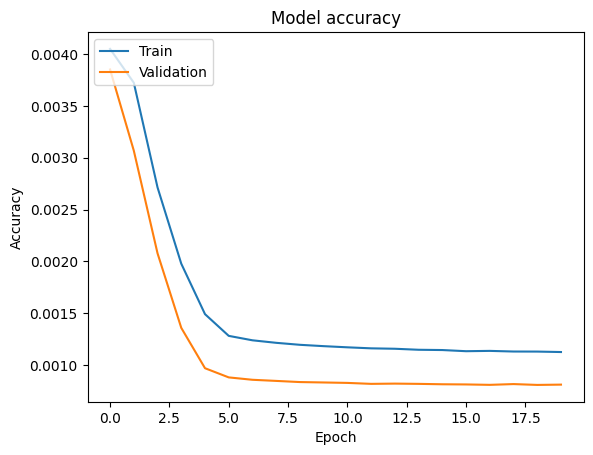

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:
# Step 4: Evaluate and Visualize the Results
# Generate clean and noisy test waveforms

NC_Trained_Test = model.predict(N_Test_Data)
NC_Trained_Original= model.predict( N_Train_Data)
#predict and rescale

NC_Trained_Test_resized = (NC_Trained_Test)*max
NC_Trained_Original_resized = (NC_Trained_Original)*max
C_Test_Real_resized=(C_Test_Real)*max

print("Done!")

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 634ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step
Done!


In [59]:
print(np.shape(C_Test_Real_resized))
print(np.shape(NC_Trained_Test_resized))

(192, 1000, 16)
(192, 1000, 16)


In [62]:
for i in range(8):
    display_n_plots_format2(t_axis,C_Test_Real_resized,16,i,NC_Trained_Test_resized,1,True)


--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------
--------------------------------------------------------


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [53]:
model.save("LSTM_RNN_1.keras")